## Screen for cell-cell communication among the identified cortical layers

We run cell-cell communication analysis using the COMMOT software.

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

import commot as ct

### Load results

In [2]:
res_path = "Results/INSPIRE_diff_tech_brain"
adata = sc.read_h5ad(res_path + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_path + "/basis_df_inspire.csv", index_col=0)

adata = adata[adata.obs.slice.values.astype(str) == str(1), :]

### Visualize INSPIRE's identified cortical layers

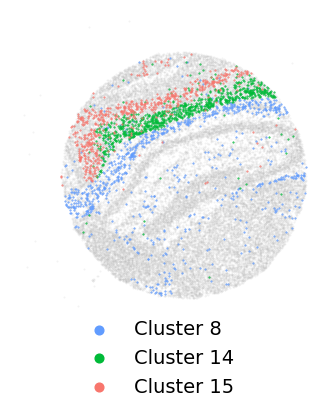

In [3]:
data_dir = "data/SlideseqV2_mouse_hippocampus"
adata_slideseqv2 = sc.read_h5ad(data_dir+"/adata_slideseqv2_Puck_200115_08.h5ad")
adata_slideseqv2.var_names_make_unique()
adata_slideseqv2.obs.index = adata_slideseqv2.obs.index + "-1"
adata_slideseqv2 = adata_slideseqv2[adata.obs.index, :]
adata_slideseqv2.obs["louvain"] = adata.obs["louvain"]

size = 0.2

f = plt.figure(figsize=(4,4))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
adata_tmp = adata_slideseqv2
ax.scatter(adata_tmp.obsm["spatial"][:, 0], 
           -adata_tmp.obsm["spatial"][:, 1], 
           s=size, c="gray", alpha=0.1)
cluster_colors = ["#619CFF", "#00BA38", "#F8766D"]
cluster_list = [8, 14, 15]
for i in range(3):
    ax.scatter(adata_tmp.obsm["spatial"][adata_tmp.obs["louvain"].values.astype(str)==str(cluster_list[i]), 0], 
               -adata_tmp.obsm["spatial"][adata_tmp.obs["louvain"].values.astype(str)==str(cluster_list[i]), 1], 
               s=size, c=cluster_colors[i], label="Cluster "+str(cluster_list[i]), rasterized=True)
ax.set_axis_off()
plt.legend(frameon=False, markerscale=14, fontsize=14, ncol=1, bbox_to_anchor=(0.78,0.05))
plt.show()

### Screen for cell-cell communication

In [4]:
louvain_list = ["15","14","0","8"]
idx = [(lc in louvain_list) for lc in list(adata.obs.louvain.values.astype(str))]
adata = adata[idx, :]

data_dir = "data/SlideseqV2_mouse_hippocampus"
adata_slideseqv2 = sc.read_h5ad(data_dir+"/adata_slideseqv2_Puck_200115_08.h5ad")
adata_slideseqv2.var_names_make_unique()
adata_slideseqv2.obs.index = adata_slideseqv2.obs.index + "-1"
adata_slideseqv2 = adata_slideseqv2[adata.obs.index, :]
adata_slideseqv2.obs["louvain"] = adata.obs["louvain"]

In [5]:
sc.pp.normalize_total(adata_slideseqv2, inplace=True)
sc.pp.log1p(adata_slideseqv2)

In [6]:
df_cellchat = ct.pp.ligand_receptor_database(species='mouse', database='CellChat', signaling_type=None)
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_slideseqv2, min_cell_pct=0.01)

In [7]:
genes_L = []
genes_R = []
for i in range(df_cellchat_filtered.shape[0]):
    rp = list(df_cellchat_filtered[1])[i]
    rp_list = rp.split("_")
    lg = list(df_cellchat_filtered[0])[i]
    lg_list = lg.split("_")
    for r in rp_list:
        for l in lg_list:
            genes_R.append(r)
            genes_L.append(l)

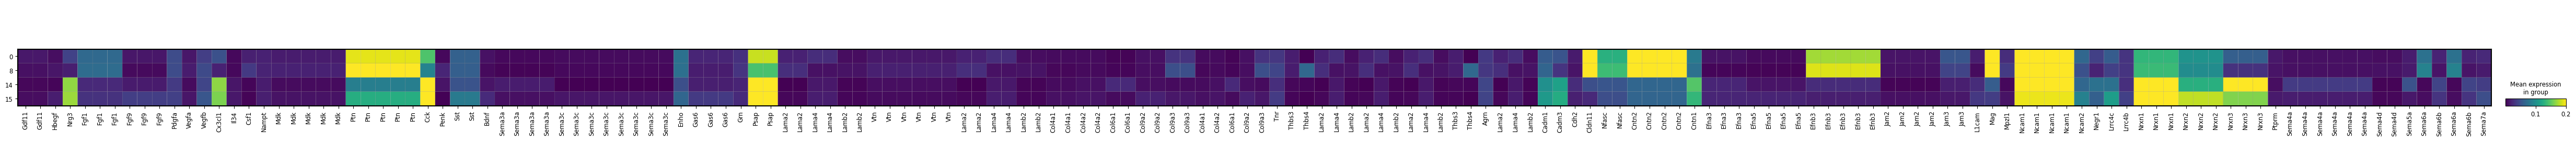

In [8]:
sc.pl.matrixplot(adata_slideseqv2, genes_L, "louvain", dendrogram=False, vmax=0.2)

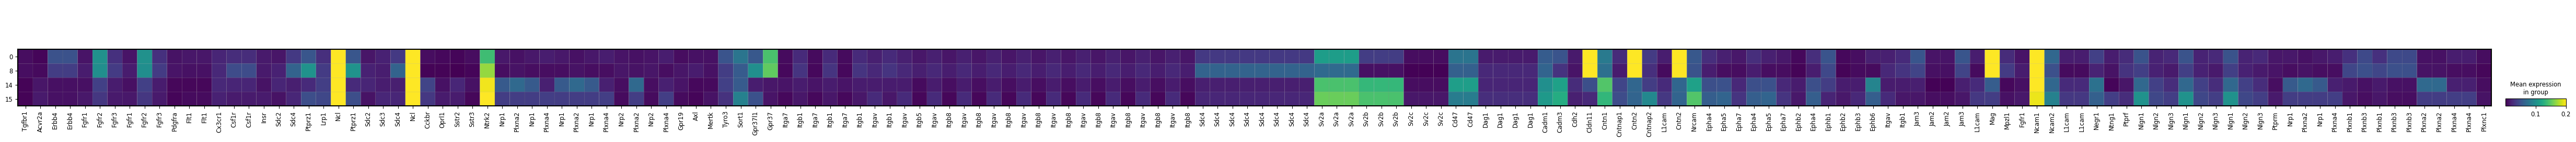

In [9]:
sc.pl.matrixplot(adata_slideseqv2, genes_R, "louvain", dendrogram=False, vmax=0.2)

In [10]:
res_path = "Results/INSPIRE_diff_tech_brain"
adata = sc.read_h5ad(res_path + "/adata_inspire.h5ad")
adata = adata[adata.obs.slice.values.astype(str) == str(1), :]

data_dir = "data/SlideseqV2_mouse_hippocampus"
adata_slideseqv2 = sc.read_h5ad(data_dir+"/adata_slideseqv2_Puck_200115_08.h5ad")
adata_slideseqv2.var_names_make_unique()
adata_slideseqv2.obs.index = adata_slideseqv2.obs.index + "-1"
adata_slideseqv2 = adata_slideseqv2[adata.obs.index, :]
adata_slideseqv2.obs["louvain"] = adata.obs["louvain"]

sc.pp.normalize_total(adata_slideseqv2, inplace=True)
sc.pp.log1p(adata_slideseqv2)

In [11]:
adata_slideseqv2.obsm["spatial"][:,1] = -adata_slideseqv2.obsm["spatial"][:,1]

In [12]:
df_cellchat_filtered = df_cellchat_filtered.loc[df_cellchat_filtered[0]=="Sema6a", :]
df_cellchat_filtered = df_cellchat_filtered.loc[df_cellchat_filtered[1]=="Plxna2", :]
df_cellchat_filtered

,0,1,2,3
135,Sema6a,Plxna2,SEMA6,Cell-Cell Contact


In [13]:
ct.tl.spatial_communication(adata_slideseqv2, database_name='cellchat', 
                            df_ligrec=df_cellchat_filtered, 
                            dis_thr=150, heteromeric=True, pathway_sum=True)

In [14]:
ct.tl.communication_direction(adata_slideseqv2, database_name='cellchat', pathway_name="Sema6a-Plxna2", k=10)

<AxesSubplot:>

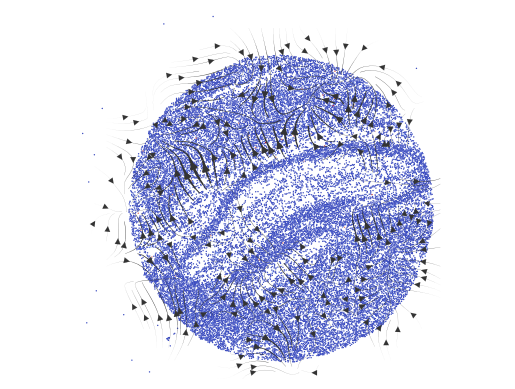

In [15]:
ct.pl.plot_cell_communication(adata_slideseqv2, database_name='cellchat', pathway_name="Sema6a-Plxna2", 
                              plot_method='stream', background_legend=True, 
                              scale=0.00006, ndsize=1, grid_density=0.5, summary='sender', background='summary',
                              normalize_v = True, normalize_v_quantile=0.995, stream_density=2)

<AxesSubplot:>

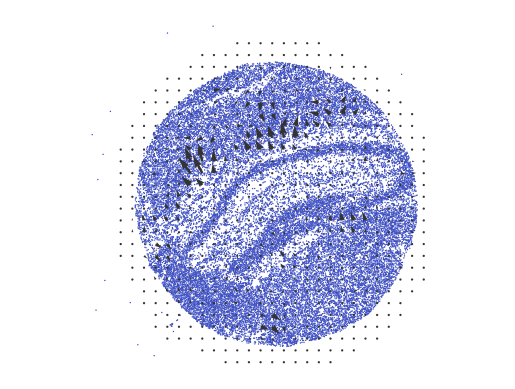

In [16]:
ct.pl.plot_cell_communication(adata_slideseqv2, database_name='cellchat', pathway_name="Sema6a-Plxna2", 
                              plot_method='grid', background_legend=True,
                              scale=0.00007, ndsize=1, grid_density=0.6, summary='sender', background='summary',
                              normalize_v = True, normalize_v_quantile=0.995, stream_density=2)

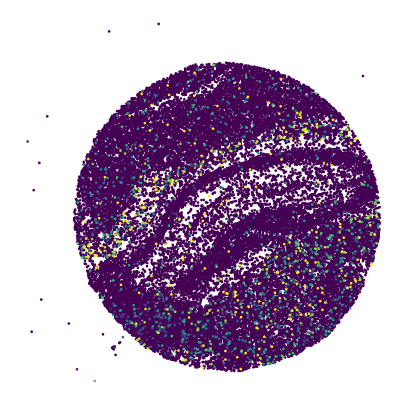

In [17]:
size = 0.8
gene = "Sema6a"

# louvain
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
adata_tmp = adata_slideseqv2
g_val = np.array(adata_tmp[:,gene].X).reshape(-1)
order = np.argsort(g_val)
pt = ax.scatter(adata_tmp.obsm["spatial"][order, 0], adata_tmp.obsm["spatial"][order, 1], 
                s=size, c=g_val[order], cmap="viridis", rasterized=True, vmax=1.0, vmin=0.0)
ax.set_axis_off()
f.subplots_adjust(hspace=0.02, wspace=0.1)
plt.show()

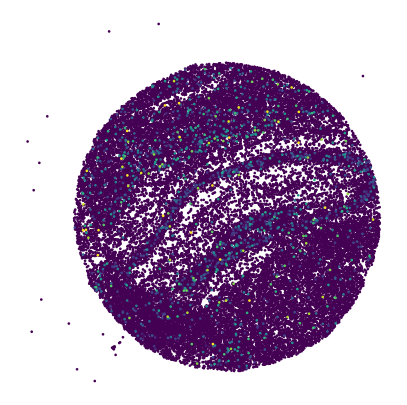

In [18]:
size = 0.8
gene = "Plxna2"

# louvain
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
adata_tmp = adata_slideseqv2
g_val = np.array(adata_tmp[:,gene].X).reshape(-1)
order = np.argsort(g_val)
pt = ax.scatter(adata_tmp.obsm["spatial"][order, 0], adata_tmp.obsm["spatial"][order, 1], 
          s=size, c=g_val[order], cmap="viridis", rasterized=True, vmax=1.2, vmin=0.0)
ax.set_axis_off()
f.subplots_adjust(hspace=0.02, wspace=0.1)
plt.show()

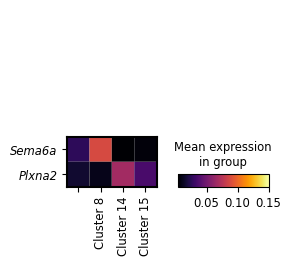

In [19]:
adata_slideseqv2.obs["cluster"] = ""
adata_slideseqv2.obs["cluster"][adata_slideseqv2.obs["louvain"].values.astype(str) == "8"] = "Cluster 8"
adata_slideseqv2.obs["cluster"][adata_slideseqv2.obs["louvain"].values.astype(str) == "14"] = "Cluster 14"
adata_slideseqv2.obs["cluster"][adata_slideseqv2.obs["louvain"].values.astype(str) == "15"] = "Cluster 15"

fig, ax = plt.subplots(figsize=(2.6,2.3))
mt = sc.pl.matrixplot(adata_slideseqv2, ["Sema6a","Plxna2"], "cluster", dendrogram=False, vmax=0.15, 
                      ax=ax, show=False,
                      swap_axes=True, cmap='inferno', var_group_rotation=0)
ax_main = mt['mainplot_ax']
for l in ax_main.get_yticklabels():
    l.set_style('italic')
for l in ax_main.get_xticklabels():
    l.set_rotation(90)
plt.show()